In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [3]:
#Loading the dataset

df = pd.read_csv('/Users/prachisadarangani/Documents/Projects/Crime Data/NYPD_Year_To_Date_Complaints.csv')
df

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
0,BRONX,03/04/2023,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)"
1,STATEN ISLAND,05/19/2023,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),<18,BLACK,M,<18,BLACK,M,NaN
2,BRONX,06/24/2023,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,(null),25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)"
3,MANHATTAN,04/01/2022,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,E,"(40.815904, -73.945123)"
4,MANHATTAN,12/29/2022,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271712,BROOKLYN,06/28/2023,21:10:00,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,RESIDENCE - APT. HOUSE,45-64,WHITE,F,65,WHITE,F,"(40.653822, -73.910472)"
271713,MANHATTAN,06/29/2023,14:45:00,MISDEMEANOR,INSIDE,PETIT LARCENY,TELECOMM. STORE,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D,"(40.749673, -73.987955)"
271714,BROOKLYN,06/29/2023,01:20:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,25-44,BLACK,M,25-44,BLACK,F,"(40.676472, -73.897039)"
271715,BROOKLYN,06/28/2023,10:30:00,FELONY,FRONT OF,GRAND LARCENY,STREET,(null),(null),(null),25-44,WHITE,M,"(40.694495, -73.930828)"


# exploring the dataset

In [4]:
#checking null values
df.isnull().sum()


BORO_NAME                0
DATE                     0
TIME                     0
CATEGORY                 0
LOCATION OF OCCURANCE    0
OFFENCE DESCRIPTION      0
PREMISE TYPE             0
SUSPECT AGE GROUP        0
SUSPECT RACE             0
SUSPECT SEX              0
VICTIM AGE GROUP         0
VICTIM RACE              0
VICTIM SEX               0
LATITUDE, LONGITUDE      5
dtype: int64

In [5]:
#checking counts of each column

for columns in df: 
    print("\n", columns)
    print("\n",df[columns].value_counts())


 BORO_NAME

 BROOKLYN         76380
MANHATTAN        64265
QUEENS           59577
BRONX            58909
STATEN ISLAND    12155
(null)             431
Name: BORO_NAME, dtype: int64

 DATE

 05/03/2023    1729
05/17/2023    1659
03/01/2023    1651
05/12/2023    1645
01/20/2023    1643
              ... 
09/12/2003       1
06/17/2014       1
09/09/2013       1
06/01/2012       1
04/18/2019       1
Name: DATE, Length: 1452, dtype: int64

 TIME

 12:00:00    6483
15:00:00    5185
18:00:00    4932
17:00:00    4871
20:00:00    4499
            ... 
05:53:00      10
05:59:00      10
05:22:00       9
05:41:00       9
05:34:00       8
Name: TIME, Length: 1440, dtype: int64

 CATEGORY

 MISDEMEANOR    138769
FELONY          90449
VIOLATION       42499
Name: CATEGORY, dtype: int64

 LOCATION OF OCCURANCE

 INSIDE         143440
FRONT OF        65886
(null)          52942
OPPOSITE OF      5261
REAR OF          4067
OUTSIDE           121
Name: LOCATION OF OCCURANCE, dtype: int64

 OFFENCE DESCRIPT

In [6]:
#Since the null values are (null) in the dataset, let's first convert (null) to Nan
df.replace("(null)", np.nan, inplace=True)

#Now we will use isnull() to check for NaN values
null_rows = df[df.isnull().any(axis=1)]

#Displaying the total number of rows with NaN values
total_null_rows = len(null_rows)
print(f"Total rows with NaN values: {total_null_rows}")

Total rows with NaN values: 85204


In [7]:
#Let's see how much % of data we would lose on if we were to drop these rows
total_null_rows/len(df)*100


31.357625765042307

That's 31% of information we would be missing
Since this is a lot let's look at some ways to impute the null values

In [8]:
df.isnull().sum()

BORO_NAME                  431
DATE                         0
TIME                         0
CATEGORY                     0
LOCATION OF OCCURANCE    52942
OFFENCE DESCRIPTION         13
PREMISE TYPE              7714
SUSPECT AGE GROUP        36493
SUSPECT RACE             36493
SUSPECT SEX              36493
VICTIM AGE GROUP             0
VICTIM RACE                 49
VICTIM SEX                   0
LATITUDE, LONGITUDE          5
dtype: int64

In [9]:
#Before that let's check how many columns have 3 or more than 3 null values

null_counts_per_row = df.isnull().sum(axis=1)

#Filtering rows with 3 or more null values
rows_with_3_or_more_nulls = null_counts_per_row[null_counts_per_row >= 3]

#Displaying the count of rows with 3 or more null values
total_rows_with_3_or_more_nulls = len(rows_with_3_or_more_nulls)
print(f"Total rows with 3 or more null values: {total_rows_with_3_or_more_nulls}")



Total rows with 3 or more null values: 36494


There are 36494 rows with 3 or more null values

In [10]:
#Checking the percentage
total_rows_with_3_or_more_nulls/len(df)*100


13.430885811340476

That is 13% of the data, let's see if these can be imputed as well.

In [11]:

#Let's check if its the same row that has all the three as null values 
columns_of_interest = ['SUSPECT AGE GROUP', 'SUSPECT RACE', 'SUSPECT SEX']

# Filter rows where any of the specified columns has a null value
rows_with_nulls_in_columns = df[df[columns_of_interest].isnull().any(axis=1)]

# Display the result
rows_with_nulls_in_columns


,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
6,BROOKLYN,08/20/2020,09:00:00,MISDEMEANOR,NaN,PETIT LARCENY,GAS STATION,NaN,NaN,NaN,25-44,BLACK,F,"(40.653165, -73.90974)"
8,BRONX,01/01/2023,14:00:00,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,65,UNKNOWN,M,"(40.829342, -73.891884)"
11,QUEENS,12/20/2022,08:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,"(40.748595, -73.938287)"
13,BROOKLYN,01/01/2023,00:01:00,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,NaN,NaN,NaN,65,BLACK,M,"(40.644227, -73.953826)"
14,BROOKLYN,04/04/2022,12:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,PARKING LOT/GARAGE (PUBLIC),NaN,NaN,NaN,45-64,BLACK,F,"(40.682592, -73.906009)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271661,STATEN ISLAND,06/30/2023,00:00:00,MISDEMEANOR,NaN,VEHICLE AND TRAFFIC LAWS,STREET,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,"(40.63669165845481, -74.08587824697415)"
271680,QUEENS,06/29/2023,07:30:00,MISDEMEANOR,NaN,PETIT LARCENY,PARK/PLAYGROUND,NaN,NaN,NaN,45-64,ASIAN / PACIFIC ISLANDER,F,"(40.74877824645247, -73.80976096732569)"
271689,NaN,06/29/2023,20:18:00,MISDEMEANOR,NaN,PETIT LARCENY,OTHER,NaN,NaN,NaN,25-44,BLACK,D,"(40.770157, -73.982129)"
271691,BROOKLYN,06/29/2023,09:45:00,MISDEMEANOR,NaN,PETIT LARCENY,TRANSIT FACILITY (OTHER),NaN,NaN,NaN,25-44,BLACK,F,"(40.675403247516435, -73.87191357758088)"


It is visible that there are 36494 columns where there is no information about the suspect (suspect age, suspect sex, suspect race)
There is a possibility that there is no suspect as of yet for these crimes
Hence, rather than deleting these rows, we will replace them by "No suspect"

In [12]:
#Replacing the null values in the above mentioned columns by "No suspect"
columns_of_interest = ['SUSPECT AGE GROUP', 'SUSPECT RACE', 'SUSPECT SEX']

#Replacing null values with 'No Suspect' in the specified columns
df[columns_of_interest] = df[columns_of_interest].fillna('No Suspect')


In [13]:
df.isnull().sum()

BORO_NAME                  431
DATE                         0
TIME                         0
CATEGORY                     0
LOCATION OF OCCURANCE    52942
OFFENCE DESCRIPTION         13
PREMISE TYPE              7714
SUSPECT AGE GROUP            0
SUSPECT RACE                 0
SUSPECT SEX                  0
VICTIM AGE GROUP             0
VICTIM RACE                 49
VICTIM SEX                   0
LATITUDE, LONGITUDE          5
dtype: int64

In [14]:
#let's see the null values for latitude and longitude
df[df['LATITUDE, LONGITUDE'].isnull() == True]
#we will keep this data and only remove it later for the map visualization 

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
1,STATEN ISLAND,05/19/2023,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,<18,BLACK,M,<18,BLACK,M,NaN
68240,BROOKLYN,02/06/2023,10:16:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,MULTI DWELL - APT BUILD,No Suspect,No Suspect,No Suspect,18-24,BLACK,M,NaN
224377,BROOKLYN,06/04/2023,00:20:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,25-44,BLACK,M,25-44,BLACK,M,NaN
235118,MANHATTAN,06/09/2023,08:13:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,25-44,BLACK,M,25-44,BLACK,M,NaN
264140,MANHATTAN,06/21/2023,16:25:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,No Suspect,No Suspect,No Suspect,25-44,BLACK,M,NaN


/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_66136/1063388918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["LATITUDE, LONGITUDE"] = df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: tuple(reversed(eval(str(x)))))


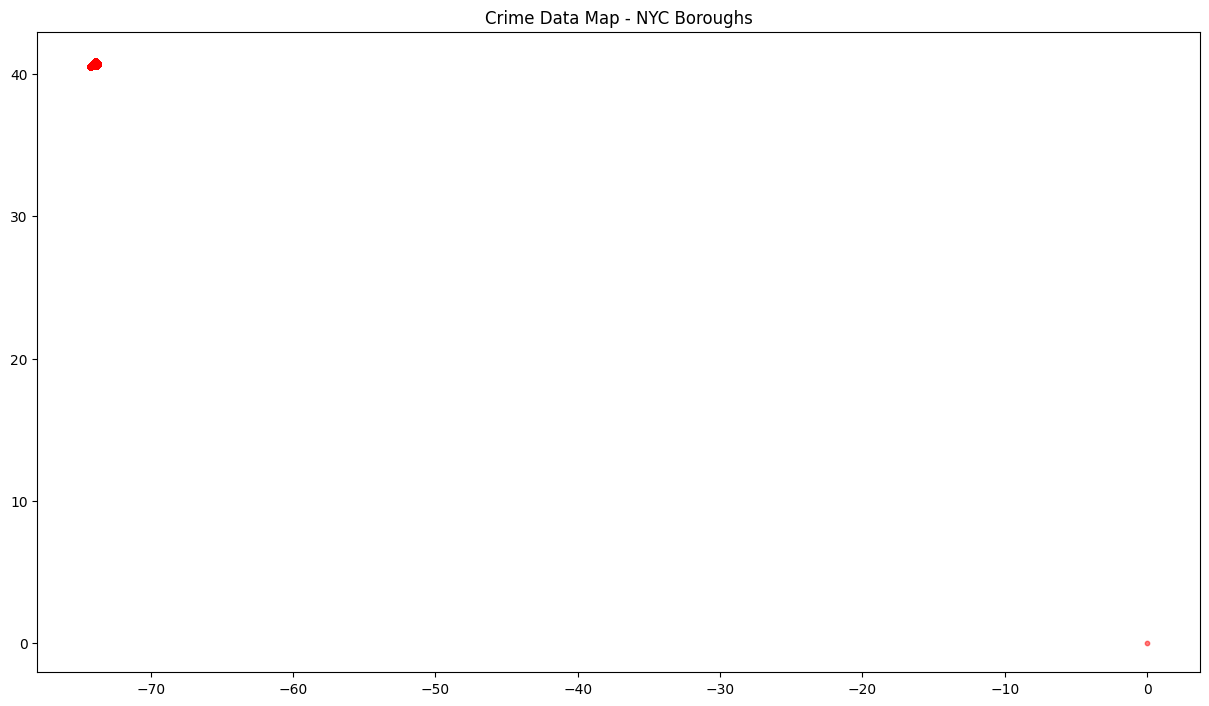

In [15]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

df_cleaned = df.dropna(subset=["LATITUDE, LONGITUDE"])

# Swap latitude and longitude in the "LATITUDE, LONGITUDE" column
df_cleaned["LATITUDE, LONGITUDE"] = df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: tuple(reversed(eval(str(x)))))

# Convert the "LATITUDE, LONGITUDE" column to a GeoDataFrame with Point geometries
geometry = df_cleaned["LATITUDE, LONGITUDE"].apply(Point)
geo_df = gpd.GeoDataFrame(df_cleaned, geometry=geometry)
                          
# Load NYC boroughs GeoDataFrame
nyc_boroughs_url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON"
nyc_boroughs = gpd.read_file(nyc_boroughs_url)

# Create a GeoDataFrame for the map
ax = nyc_boroughs.plot(figsize=(15, 10), color='lightgray', edgecolor='black')

# Plot the points from the crime data
geo_df.plot(ax=ax, color='red', marker='o', markersize=10, alpha=0.5)

plt.title('Crime Data Map - NYC Boroughs')
plt.show()

As we can see from the above visualization, there is an outlier present which could hamper our analysis so let's look into it further.

In [16]:
#Trying to find the outlier that has the cordinates close to 0,0
threshold = 1e-6

rows_near_zero_coordinates = df_cleaned[
    (np.abs(df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: x[0])) < threshold) &
    (np.abs(df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: x[1])) < threshold)
]

rows_near_zero_coordinates

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
132844,MANHATTAN,03/29/2023,01:55:00,MISDEMEANOR,NaN,INTOXICATED & IMPAIRED DRIVING,STREET,25-44,UNKNOWN,M,UNKNOWN,UNKNOWN,E,"(0.0, 0.0)"


In [17]:
#We can see which row has (0.0,0.0) coordinates, now lets change it to null
df.replace("(0.0, 0.0)", np.nan, inplace=True)

/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_66136/874964350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["LATITUDE, LONGITUDE"] = df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: tuple(reversed(eval(str(x)))))


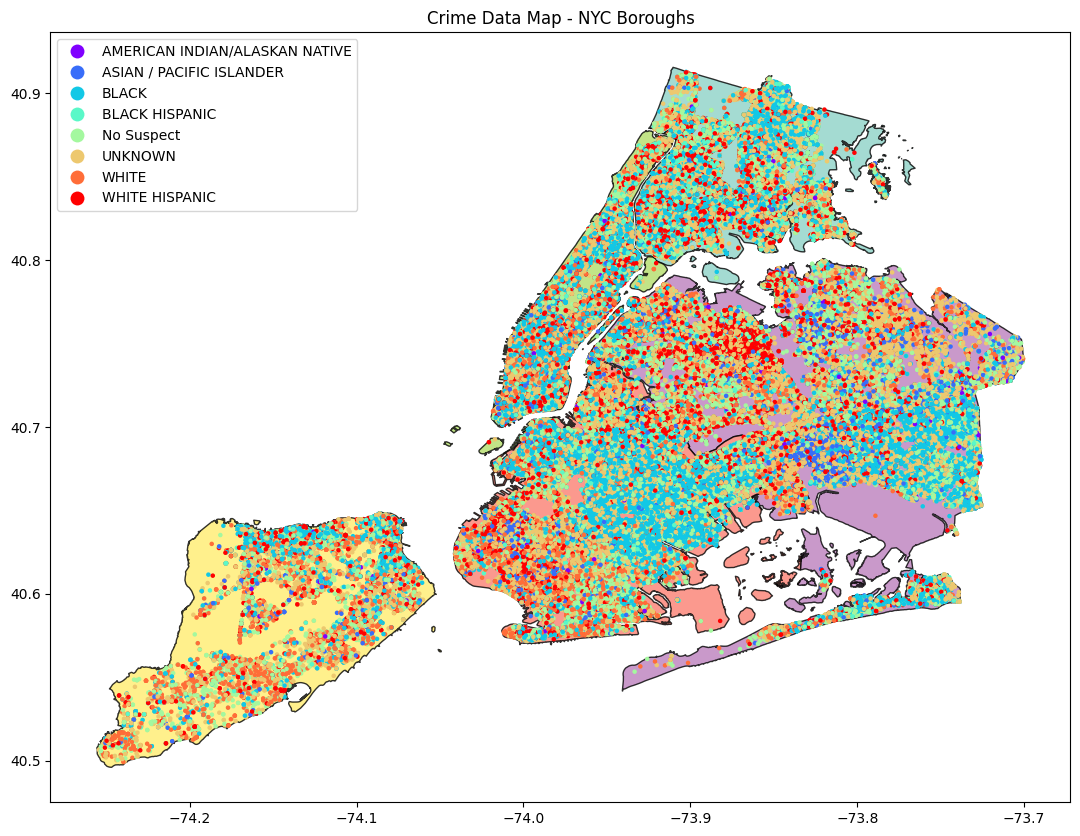

In [18]:
#Let's try it again now
df_cleaned = df.dropna(subset=["LATITUDE, LONGITUDE"])

#Swapping latitude and longitude in the "LATITUDE, LONGITUDE" column
df_cleaned["LATITUDE, LONGITUDE"] = df_cleaned["LATITUDE, LONGITUDE"].apply(lambda x: tuple(reversed(eval(str(x)))))

#Converting the "LATITUDE, LONGITUDE" column to a GeoDataFrame with Point geometries
geometry = df_cleaned["LATITUDE, LONGITUDE"].apply(Point)
geo_df = gpd.GeoDataFrame(df_cleaned, geometry=geometry)
                          
#Loading NYC boroughs GeoDataFrame
nyc_boroughs_url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON"
nyc_boroughs = gpd.read_file(nyc_boroughs_url)

#Creating a GeoDataFrame for the map
ax = nyc_boroughs.plot(figsize=(15, 10), column='boro_name', alpha=0.8,legend=True, label = 'boro_name', cmap='Set3', edgecolor='black')
ax.set_title('NYC Boroughs')

#Ploting the points from the crime data, color-coded by the "SUSPECT RACE" attribute
geo_df.plot(ax=ax, column='SUSPECT RACE', markersize=5, alpha=1, legend=True, label='SUSPECT RACE', cmap='rainbow')

plt.title('Crime Data Map - NYC Boroughs')
plt.show()

The above visualization shows the map of the nyc borough, plotting the location of each of the crimes from the dataset showing the race of the suspect. 

We can see from the map that the crimes are less concentrated in Staten Island. Towards the northwest side of Staten Island, the crimes seem to be way lesser comapred to the rest of Staten Island. 

Moreover, from the map, in the other 4 boroughs, we can see a few blank spots where the crime is really low. Some of these spots are areas such as the Central Park in Manhattan, the JFK airport and LaGaurdia Airports in Queens, Split Rock and Pelham Bay in Bronx and other such areas.

Additionally, we can see that northeast of Brooklyn is concentrated with green dots, that tells us that black people are dominantly the suspect of the crimes in that area. Similarly, we can see that north region of queens is concentrated with red dots which means white people are dominantly the suspects of the crime in that area.

In [19]:
#going to find the boro_name of the missing values using the latitude and longitude 

# Perform a spatial join to get the BORO_NAME for each point
joined_df = gpd.sjoin(geo_df, nyc_boroughs, how="left", op="within")
nyc_boroughs.to_crs("EPSG:4326", inplace=True)
# Fill the null values in the "BORO_NAME" column with the values from the spatial join
df["BORO_NAME"].fillna(joined_df["boro_name"].str.upper(), inplace=True)


/Users/prachisadarangani/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_66136/1803327021.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_df = gpd.sjoin(geo_df, nyc_boroughs, how="left", op="within")


In [20]:
df['BORO_NAME'].isnull().sum()

0

In [21]:
df['BORO_NAME'].unique()

#Now we have found the missing values for the boro_name 

array(['BRONX', 'STATEN ISLAND', 'MANHATTAN', 'BROOKLYN', 'QUEENS'],
      dtype=object)

In [22]:
df.isnull().sum()

BORO_NAME                    0
DATE                         0
TIME                         0
CATEGORY                     0
LOCATION OF OCCURANCE    52942
OFFENCE DESCRIPTION         13
PREMISE TYPE              7714
SUSPECT AGE GROUP            0
SUSPECT RACE                 0
SUSPECT SEX                  0
VICTIM AGE GROUP             0
VICTIM RACE                 49
VICTIM SEX                   0
LATITUDE, LONGITUDE          6
dtype: int64

In [23]:
#There are 61 offence description, let's see the unique values
df['OFFENCE DESCRIPTION'].unique()

array(['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'HARRASSMENT 2',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'RAPE',
       'GRAND LARCENY', 'THEFT-FRAUD', 'CRIMINAL MISCHIEF & RELATED OF',
       'GRAND LARCENY OF MOTOR VEHICLE', 'DANGEROUS WEAPONS',
       'SEX CRIMES', 'FRAUDS', 'BURGLARY', 'ASSAULT 3 & RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'FELONY ASSAULT',
       'OFFENSES AGAINST PUBLIC ADMINI', 'MISCELLANEOUS PENAL LAW',
       'INTOXICATED & IMPAIRED DRIVING', 'DANGEROUS DRUGS',
       'UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS',
       'CRIMINAL TRESPASS', 'FORGERY', 'OTHER STATE LAWS (NON PENAL LA',
       'OFFENSES INVOLVING FRAUD', 'POSSESSION OF STOLEN PROPERTY',
       'OTHER OFFENSES RELATED TO THEF', 'FRAUDULENT ACCOSTING',
       'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'OFFENSES AGAINST THE PERSON',
       nan, 'PETIT LARCENY OF MOTOR VEHICLE', 'ARSON',
       'PROSTITUTION & RELATED OFFENSES', 'KIDNAPPING & RELATED OFFEN

In [24]:
#Reducing the offence description in categories to visualize it better

#Creating a new column 'Crime Category' based on provided classifications
#Defining mapping categories
crime_category_mapping = {
    'Violent Crimes': ['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ASSAULT 3 & RELATED OFFENSES',
                       'FELONY ASSAULT', 'HOMICIDE-NEGLIGENT, UNCLASSIFIED', 'KIDNAPPING & RELATED OFFENSES',
                       'FELONY SEX CRIMES', 'ENDAN WELFARE INCOMP'],
    'Property Crimes': ['PETIT LARCENY', 'GRAND LARCENY', 'THEFT-FRAUD', 'GRAND LARCENY OF MOTOR VEHICLE',
                        'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'UNAUTHORIZED USE OF A VEHICLE',
                        'POSSESSION OF STOLEN PROPERTY', 'PETIT LARCENY OF MOTOR VEHICLE', 'ARSON',
                        "BURGLAR'S TOOLS"],
    'Drug and Substance-Related Crimes': ['DANGEROUS WEAPONS', 'DANGEROUS DRUGS', 'CANNABIS RELATED OFFENSES',
                                          'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING'],
    'Fraud and White-Collar Crimes': ['FRAUDS', 'FORGERY', 'OFFENSES INVOLVING FRAUD', 'FRAUDULENT ACCOSTING',
                                      'THEFT OF SERVICES'],
    'Sex Crimes': ['SEX CRIMES', 'PROSTITUTION & RELATED OFFENSES'],
    'Public Order Offenses': ['HARRASSMENT 2', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI',
                              'DISORDERLY CONDUCT', 'OFFENSES AGAINST PUBLIC SAFETY'],
    'Traffic and Vehicle-Related Offenses': ['VEHICLE AND TRAFFIC LAWS', 'OTHER TRAFFIC INFRACTION',
                                             'UNLAWFUL POSS. WEAP. ON SCHOOL'],
    'Miscellaneous Offenses': ['MISCELLANEOUS PENAL LAW', 'OTHER OFFENSES RELATED TO THEF', 'ADMINISTRATIVE CODE',
                               'ANTICIPATORY OFFENSES', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
                               'JOSTLING', 'GAMBLING'],
    'Offenses Related to Children': ['OFFENSES RELATED TO CHILDREN', 'CHILD ABANDONMENT/NON SUPPORT'],
    'Other Specific Offenses': ['Other Specific Offenses']
}

# Create a new column 'Crime Category' with mapped values
df['Crime Category'] = df['OFFENCE DESCRIPTION'].map({v: k for k, values in crime_category_mapping.items() for v in values})


In [25]:
df['Crime Category'].unique()

array(['Violent Crimes', 'Public Order Offenses', 'Property Crimes',
       'Drug and Substance-Related Crimes', 'Sex Crimes',
       'Fraud and White-Collar Crimes', nan, 'Miscellaneous Offenses',
       'Traffic and Vehicle-Related Offenses',
       'Offenses Related to Children'], dtype=object)

In [26]:
#Let's do the same for the premise type
df['PREMISE TYPE'].unique()

array(['BANK', nan, 'OTHER', 'RESIDENCE - APT. HOUSE', 'GAS STATION',
       'RESIDENCE-HOUSE', 'HOSPITAL', 'DRUG STORE',
       'PARKING LOT/GARAGE (PUBLIC)', 'CHAIN STORE',
       'RESIDENCE - PUBLIC HOUSING', 'GROCERY/BODEGA', 'MAILBOX OUTSIDE',
       'STREET', 'HOTEL/MOTEL', 'COMMERCIAL BUILDING',
       'TRANSIT - NYC SUBWAY', 'DEPARTMENT STORE', 'CLOTHING/BOUTIQUE',
       'CONSTRUCTION SITE', 'MARINA/PIER', 'HOMELESS SHELTER',
       'BAR/NIGHT CLUB', 'RESTAURANT/DINER', 'PUBLIC BUILDING',
       'STORE UNCLASSIFIED', 'BUS (NYC TRANSIT)', 'CHURCH',
       'STORAGE FACILITY', 'VARIETY STORE', 'CANDY STORE',
       'HIGHWAY/PARKWAY', 'PUBLIC SCHOOL', 'AIRPORT TERMINAL',
       'DRY CLEANER/LAUNDRY', 'FERRY/FERRY TERMINAL', 'MAILBOX INSIDE',
       'FACTORY/WAREHOUSE', 'FOOD SUPERMARKET', 'FAST FOOD',
       'SMALL MERCHANT', 'PARK/PLAYGROUND', 'LIQUOR STORE',
       'DAYCARE FACILITY', 'PARKING LOT/GARAGE (PRIVATE)', 'REAL ESTATE',
       'BEAUTY & NAIL SALON', 'CEMETERY', 'PRIVA

In [27]:
#Let's check how many null values are present
df['PREMISE TYPE'].isnull().sum()

#There are 7714 null values 
#checking the % now
df['PREMISE TYPE'].isnull().sum()/len(df)*100

#It is only 2.84% of the data so we can drop the null values 


2.8389832067923613

In [28]:
category_mapping = {
    'Commercial': ['BANK', 'COMMERCIAL BUILDING','GAS STATION', 'HOTEL/MOTEL','CHAIN STORE', 'DRUG STORE','DEPARTMENT STORE','GROCERY/BODEGA', 'CLOTHING/BOUTIQUE', 'BAR/NIGHT CLUB', 'RESTAURANT/DINER', 'STORE UNCLASSIFIED', 'VARIETY STORE', 'CANDY STORE', 'LIQUOR STORE', 'FAST FOOD', 'SMALL MERCHANT', 'REAL ESTATE', 'BEAUTY & NAIL SALON', 'PHOTO/COPY', 'GYM/FITNESS FACILITY', 'DOCTOR/DENTIST OFFICE', 'CHECK CASHING BUSINESS', 'TELECOMM. STORE', 'JEWELRY', 'VIDEO STORE', 'BEAUTY/NAIL SALON', 'COMMERCIAL BLDG', 'BOOK/CARD', 'COMMERCIAL BLDG', 'SMOKE SHOP', 'FOOD SUPERMARKET', 'TELECOMM. STORE', 'DRY CLEANER/LAUNDRY', 'LOAN COMPANY'],
    'Residential': ['RESIDENCE - APT. HOUSE', 'RESIDENCE-HOUSE', 'RESIDENCE - PUBLIC HOUSING', 'HOMELESS SHELTER', 'PVT HOUSE'],
    'Transportation': ['TRANSIT - NYC SUBWAY', 'AIRPORT TERMINAL', 'FERRY/FERRY TERMINAL', 'BUS (NYC TRANSIT)', 'TRANSIT FACILITY (OTHER)', 'BUS TERMINAL', 'BUS (OTHER)', 'TAXI (LIVERY LICENSED)', 'TAXI (YELLOW LICENSED)', 'TAXI/LIVERY (UNLICENSED)', 'TRAMWAY', 'BUS STOP'],
    'Public Places or Outdoor': ['HOSPITAL', 'PUBLIC BUILDING', 'CHURCH', 'STORAGE FACILITY', 'VARIETY STORE', 'PUBLIC SCHOOL', 'COLLEGE/UNIVERSITY', 'MOSQUE', 'OTHER HOUSE OF WORSHIP', 'SOCIAL CLUB/POLICY', 'PARKING LOT/GARAGE (PUBLIC)', 'PARK/PLAYGROUND', 'STREET', 'HIGHWAY/PARKWAY', 'BRIDGE', 'TUNNEL', 'OPEN AREAS (OPEN LOTS)', 'COLLEGE/UNIVERSITY', 'CEMETERY'],
    'Other': ['OTHER', 'MAILBOX OUTSIDE', 'MAILBOX INSIDE', 'DAYCARE FACILITY', 'PARKING LOT/GARAGE (PRIVATE)', 'PRIVATE/PAROCHIAL SCHOOL', 'SYNAGOGUE', 'ATM', 'MULTI DWELL - APT BUILD', 'TUNNEL', 'MOBILE FOOD', 'MULTI DWELL - PUBLIC HOUS', 'ABANDONED BUILDING', 'SHOE', 'BOOK/CARD', 'CONSTRUCTION SITE', 'FACTORY/WAREHOUSE', 'MARINA/PIER'],
    'Unknown': [np.nan]
}

#Creating a new column 'Premise Category' with mapped values
df['Premise Category'] = df['PREMISE TYPE'].replace({v: k for k, values in category_mapping.items() for v in values})


In [29]:
df['Premise Category'].unique()

array(['Commercial', 'Unknown', 'Other', 'Residential',
       'Public Places or Outdoor', 'Transportation'], dtype=object)

In [30]:
# Let's check if all the dates are correct
df_copy = df.copy()  # Create a copy of the original DataFrame

#Converting the 'DATE' column with errors='coerce'
df_copy['DATE'] = pd.to_datetime(df_copy['DATE'], errors='coerce')

#Finding rows with NaN values in the 'DATE' column
rows_with_errors = df_copy[df_copy['DATE'].isnull()]

#Displaying the original values for the rows with errors
print(df.loc[rows_with_errors.index, 'DATE'])



286      01/27/1012
623      06/14/1018
755      03/09/1023
1465     05/11/1023
2783     04/11/1012
2949     03/24/1022
4195     03/04/1023
4954     05/06/1023
5186     05/12/1012
5757     06/06/1023
6167     04/12/1023
6756     01/02/1023
7536     01/05/1013
8149     06/13/1023
8492     06/04/1023
8909     03/23/1023
9825     01/27/1023
10539    02/15/1013
11072    05/26/1023
Name: DATE, dtype: object


In [31]:
# Assuming 'df' is your DataFrame and 'DATE' is the column containing dates
df['DATE'] = df['DATE'].astype(str).str.replace(r'/10(\d{2})', r'/20\1')
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

#Finding rows with NaN values in the 'DATE' column
rows_with_errors = df[df['DATE'].isnull()]

#Displaying the original values for the rows with errors
print(rows_with_errors[['DATE']])
print(df.loc[rows_with_errors.index, 'DATE'])

#so we have cleaned the dataset
df.iloc[286,1]
#we can see the date has been cleaned now 

/var/folders/71/v_z1m6m95c709d46xmd64xy80000gn/T/ipykernel_66136/3780217020.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['DATE'] = df['DATE'].astype(str).str.replace(r'/10(\d{2})', r'/20\1')


Empty DataFrame
Columns: [DATE]
Index: []
Series([], Name: DATE, dtype: datetime64[ns])


Timestamp('2012-01-27 00:00:00')

In [32]:
#lets check for the ages, I had noticed some errors, let's clean it 
df['SUSPECT AGE GROUP'].value_counts()

#We can see there are a lot of unknown values in the suspect age
#We can also see that there are a few errors, let's change those to null
# List of incorrect values to replace with NaN
incorrect_values = ['-963', '-953', '-5','1022','1023','2023','942','938','929','925']

#Replacing incorrect values with NaN
df['SUSPECT AGE GROUP'] = df['SUSPECT AGE GROUP'].replace(incorrect_values, np.nan)
df['SUSPECT AGE GROUP'].value_counts()

UNKNOWN       103840
25-44          76344
No Suspect     36493
45-64          26158
18-24          19943
<18             6080
65              2803
Name: SUSPECT AGE GROUP, dtype: int64

In [33]:
df['VICTIM AGE GROUP'].value_counts()

incorrect_values = ['-963', '-953', '-5', '-2', '1022', '-970', '-929', '-961', '-964', '-10', '1023', '-3', '-6', '-968', '949', '-33', '1018', '-30', '953']

#Replacing incorrect values with NaN
df['VICTIM AGE GROUP'] = df['VICTIM AGE GROUP'].replace(incorrect_values, np.nan)
df['VICTIM AGE GROUP'].value_counts()

25-44      95038
UNKNOWN    79292
45-64      50101
18-24      21927
65         13837
<18        11504
Name: VICTIM AGE GROUP, dtype: int64

In [34]:
#Checking the Suspect and Victim Sex:
df['SUSPECT SEX'].value_counts()

#Assuming U stands for Unisex, this data seems to be clean

M             136708
U              61011
F              37505
No Suspect     36493
Name: SUSPECT SEX, dtype: int64

In [35]:
df['VICTIM SEX'].value_counts()

#We can see there are additional values here, assuming that - D,E,L are typos, let's change it to unknown

incorrect_values = ['D','E','L']

# Replace incorrect values with NaN
df['VICTIM SEX'] = df['VICTIM SEX'].replace(incorrect_values, 'Unknown')
df['VICTIM SEX'].value_counts()

F          103075
M           92645
Unknown     75997
Name: VICTIM SEX, dtype: int64

# Visualizations

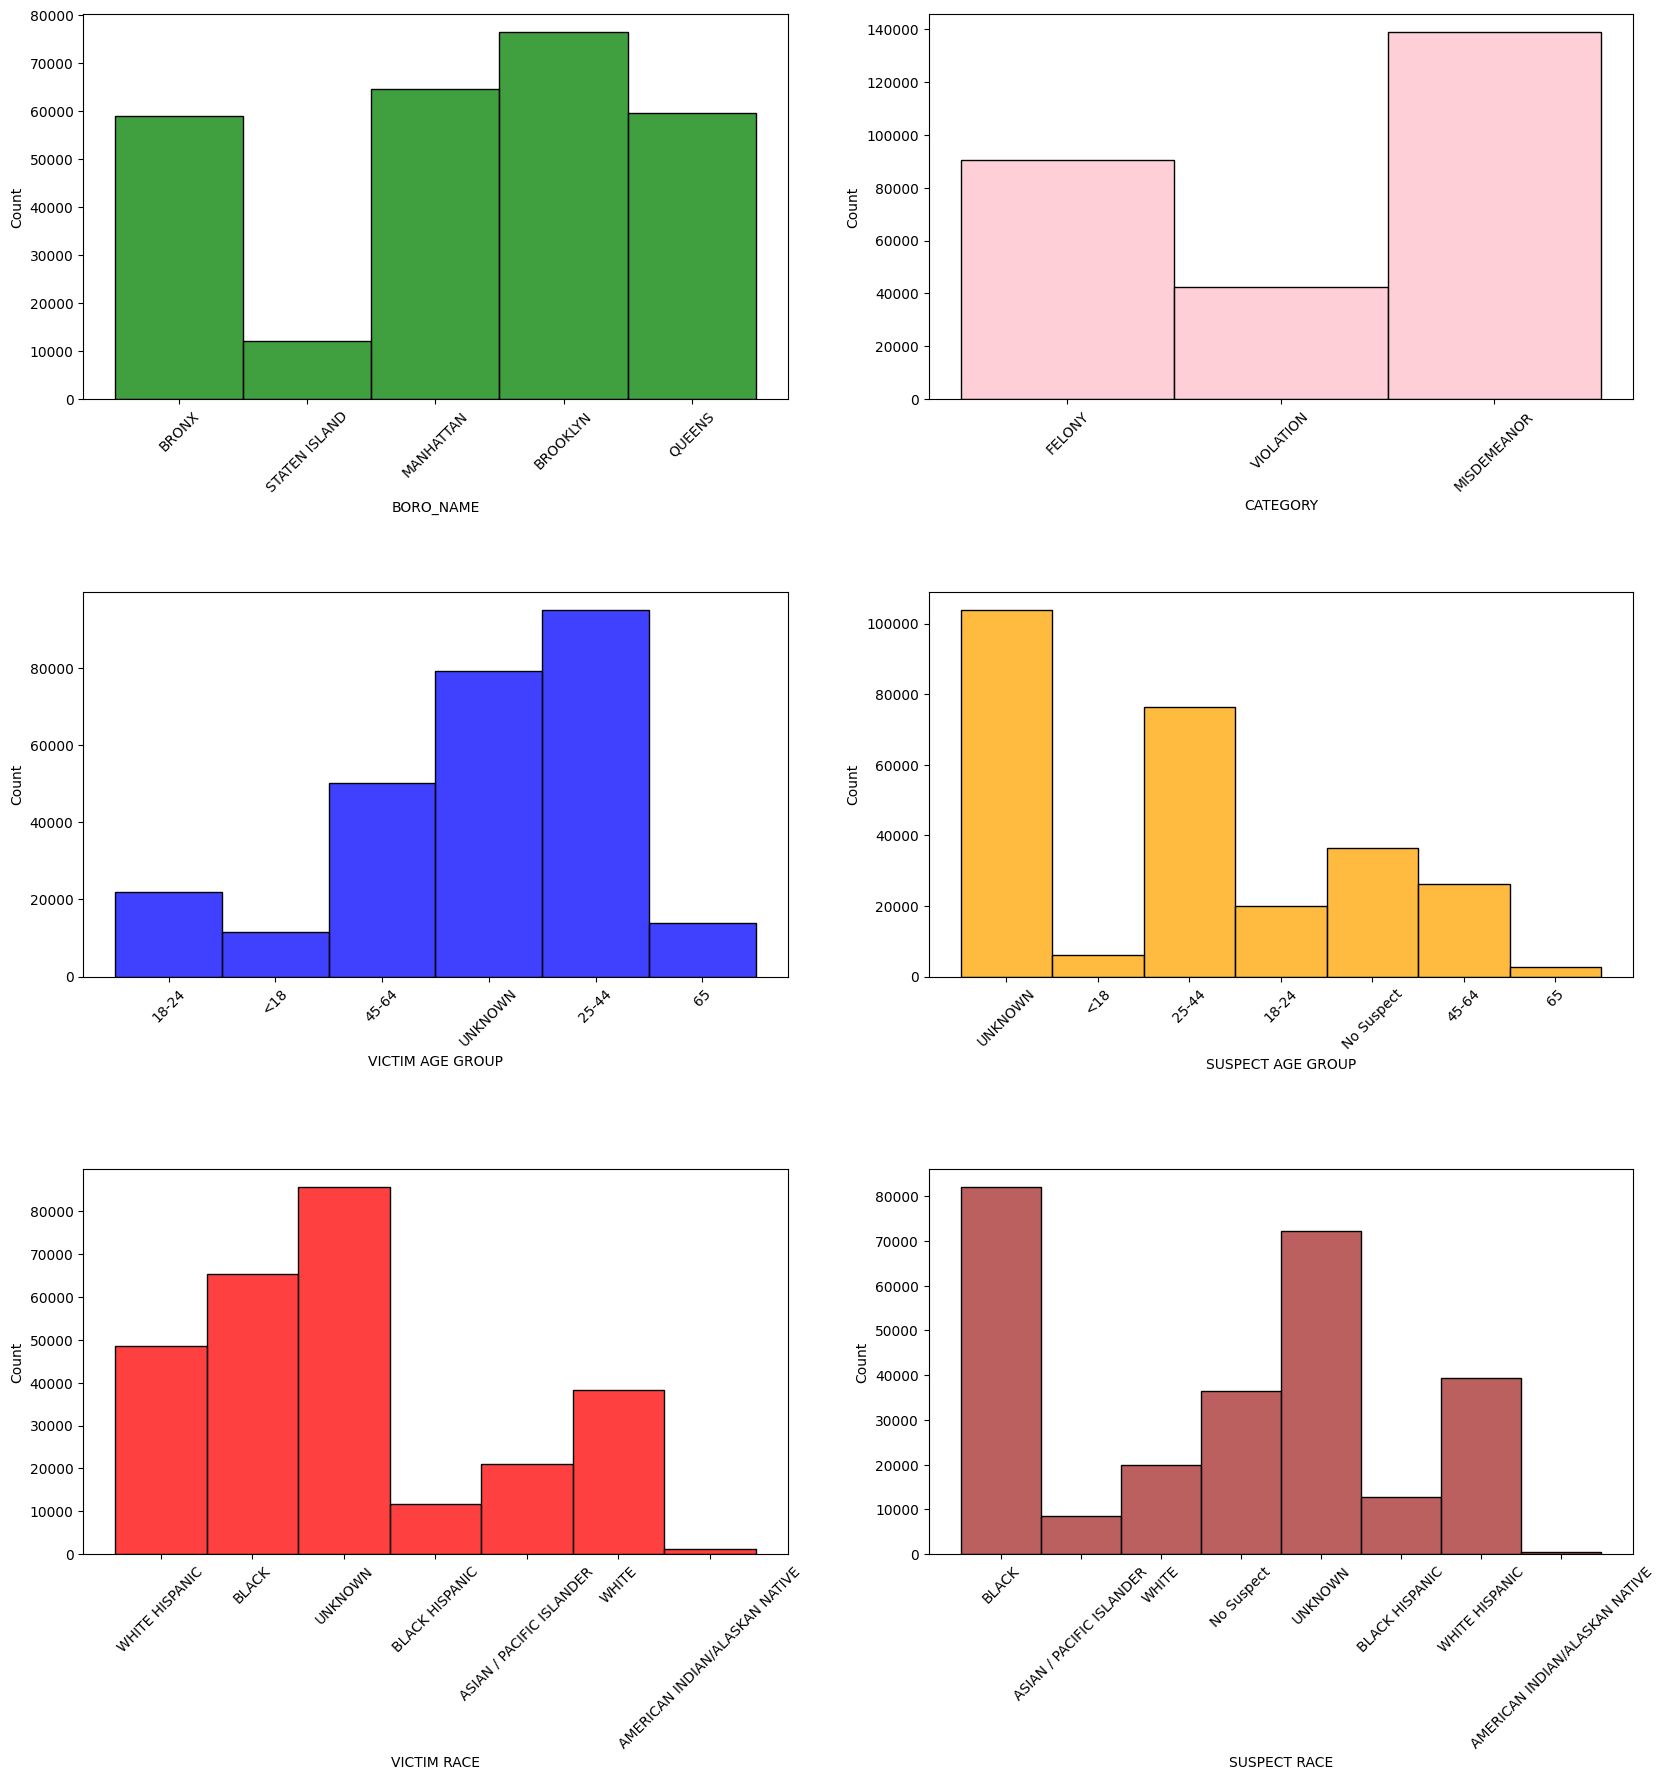

In [36]:
#let's first check the general dataset like suspect race, suspect gender, suspect age group

#plotting to see if each of the variables have a certain relation with popularity

fig, ((ax1, ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols =2, figsize =(20,20))
sns.histplot(data = df, x='BORO_NAME', color="g", ax=ax1)
sns.histplot(data = df, x='CATEGORY', ax=ax2, color = 'pink')
sns.histplot(data = df, x='VICTIM AGE GROUP', ax=ax3, color = 'blue')
sns.histplot(data = df, x='SUSPECT AGE GROUP', ax=ax4, color = 'orange')
sns.histplot(data = df, x='VICTIM RACE', ax=ax5, color = 'red')
sns.histplot(data = df, x='SUSPECT RACE', ax=ax6, color = 'brown')

plt.subplots_adjust(hspace=0.5)


ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)
ax5.tick_params(axis='x', rotation=45)
ax6.tick_params(axis='x', rotation=45)



plt.show()


From the 1st visualization, we can see that, the highest crimes take place in Brooklyn over 75000, while Staten Island has the least amount of crimes, it is under 15000
The second graph shows the category vs the number of crimes, based on that, we can see that over 12000 crimes in NYC are misdemeanor
From the third graph, it is visible that the most crimes, over 90000, are commited agaisnt people who are between the age 25 and 44 and the 4th graph tells us that the suspects of most crimes are also in the same age group (not considering the unknown value)
Moreover, victims of most crimes, over 80000, are of black race and as per the last graph, black people are also the suspect of msot crimes which is about 80000. 

These statistics could change if we were to replace the unknown values. 


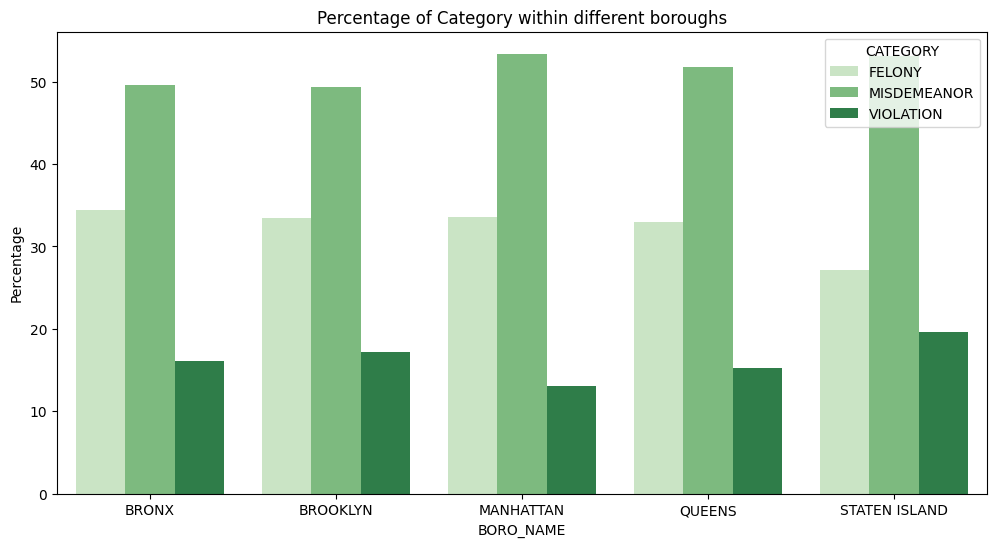

In [37]:
#Just checking for Categories

f, ax = plt.subplots(figsize=(12, 6))

# Calculate the percentage for each grade within each borough so that
percentage_data = (df.groupby(['BORO_NAME', 'CATEGORY']).size() / df.groupby('BORO_NAME').size() * 100).reset_index(name='Percentage')

# Create a bar plot with 'BORO' on the x-axis and 'Percentage' on the y-axis
sns.barplot(x='BORO_NAME', y='Percentage', hue='CATEGORY',
            data=percentage_data, palette='Greens', ax=ax)

plt.title('Percentage of Category within different boroughs')
plt.ylabel('Percentage')
plt.show()

The above graph shows the percentage of different types of crimes committed based on each borough. We can see that each of the borough follows the same trend. Each borough has the highest number of misdemeanors followed by felony and then violations. About 50% of all crimes in each borough is a misdemeanor. 

Moreover, we can see that staten island has more violation crimes compared to the other boroughs, it also has the lowest felony crimes amongst each of the borough.

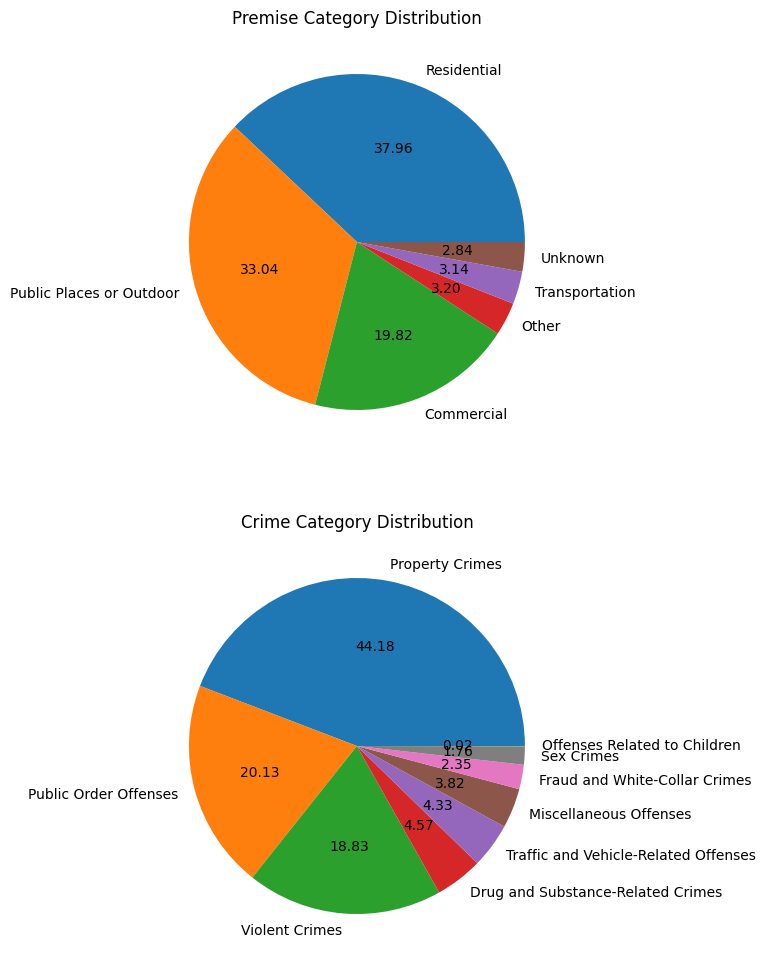

In [38]:
#Pie chart to see the suspect rate counts 
fig, ((ax1, ax2)) = plt.subplots(nrows = 2, ncols =1, figsize =(12,12))
df['Premise Category'].value_counts().plot(kind="pie", autopct="%.2f", ax=ax1)
ax1.set_title('Premise Category Distribution')
ax1.set_ylabel("")

# Plot other graph in the second subplot (you can replace this with your specific plot)
df['Crime Category'].value_counts().plot(kind="pie", autopct="%.2f", ax=ax2)
ax2.set_title('Crime Category Distribution')
ax2.set_ylabel("")

plt.show()

From the above pie charts, we can see that:

1) The most crimes are commited in residential areas, about 38% of all crimes followed by public/outdoor places which makes about 33% of all crime

2) Most crimes commited are property related crimes which is about 44% of all crimes. Public order offenses make about 20.13% of crimes followed by violent crimes which is about 19%



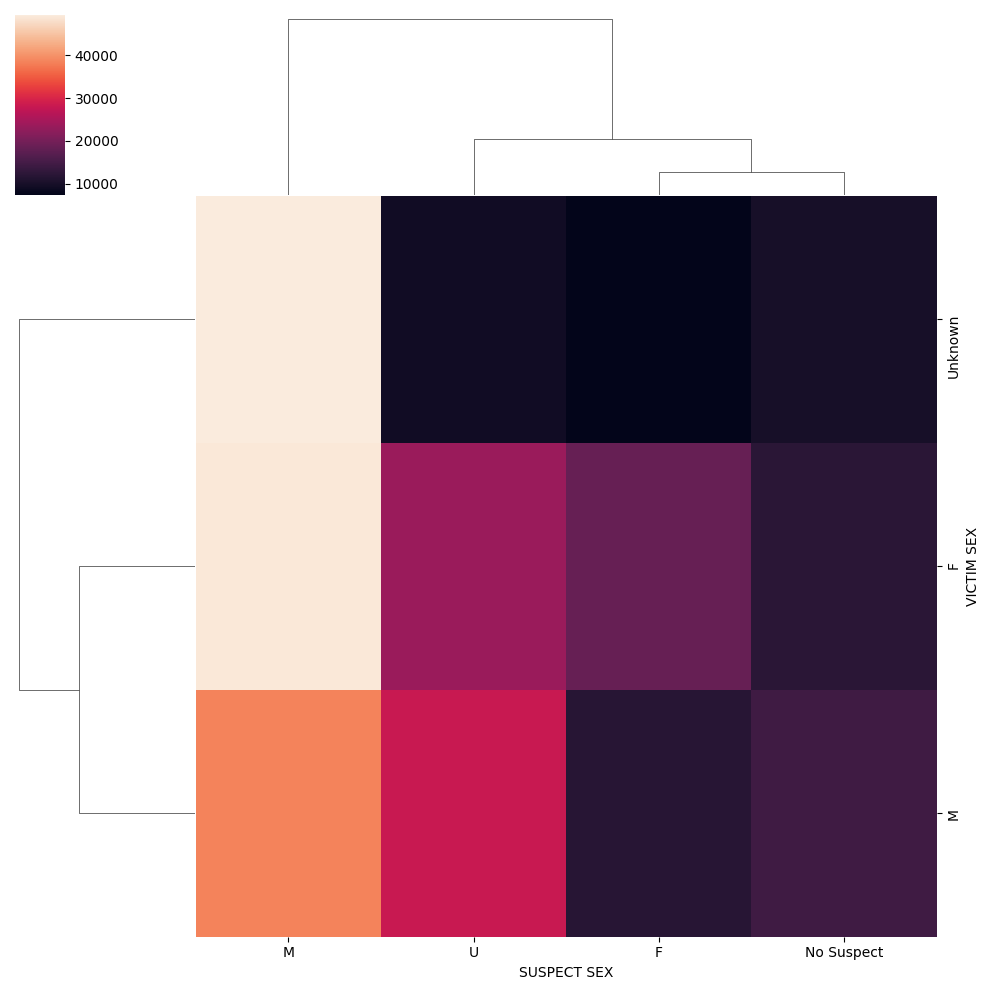

In [39]:
sns.clustermap(pd.crosstab(df['VICTIM SEX'], df['SUSPECT SEX']))
plt.show()

From the above cluster plot, we can see that males are suspects of more crimes than females. Moreover, men commit more crimes towards women than men. Females also commit more crimes towards females than males. 

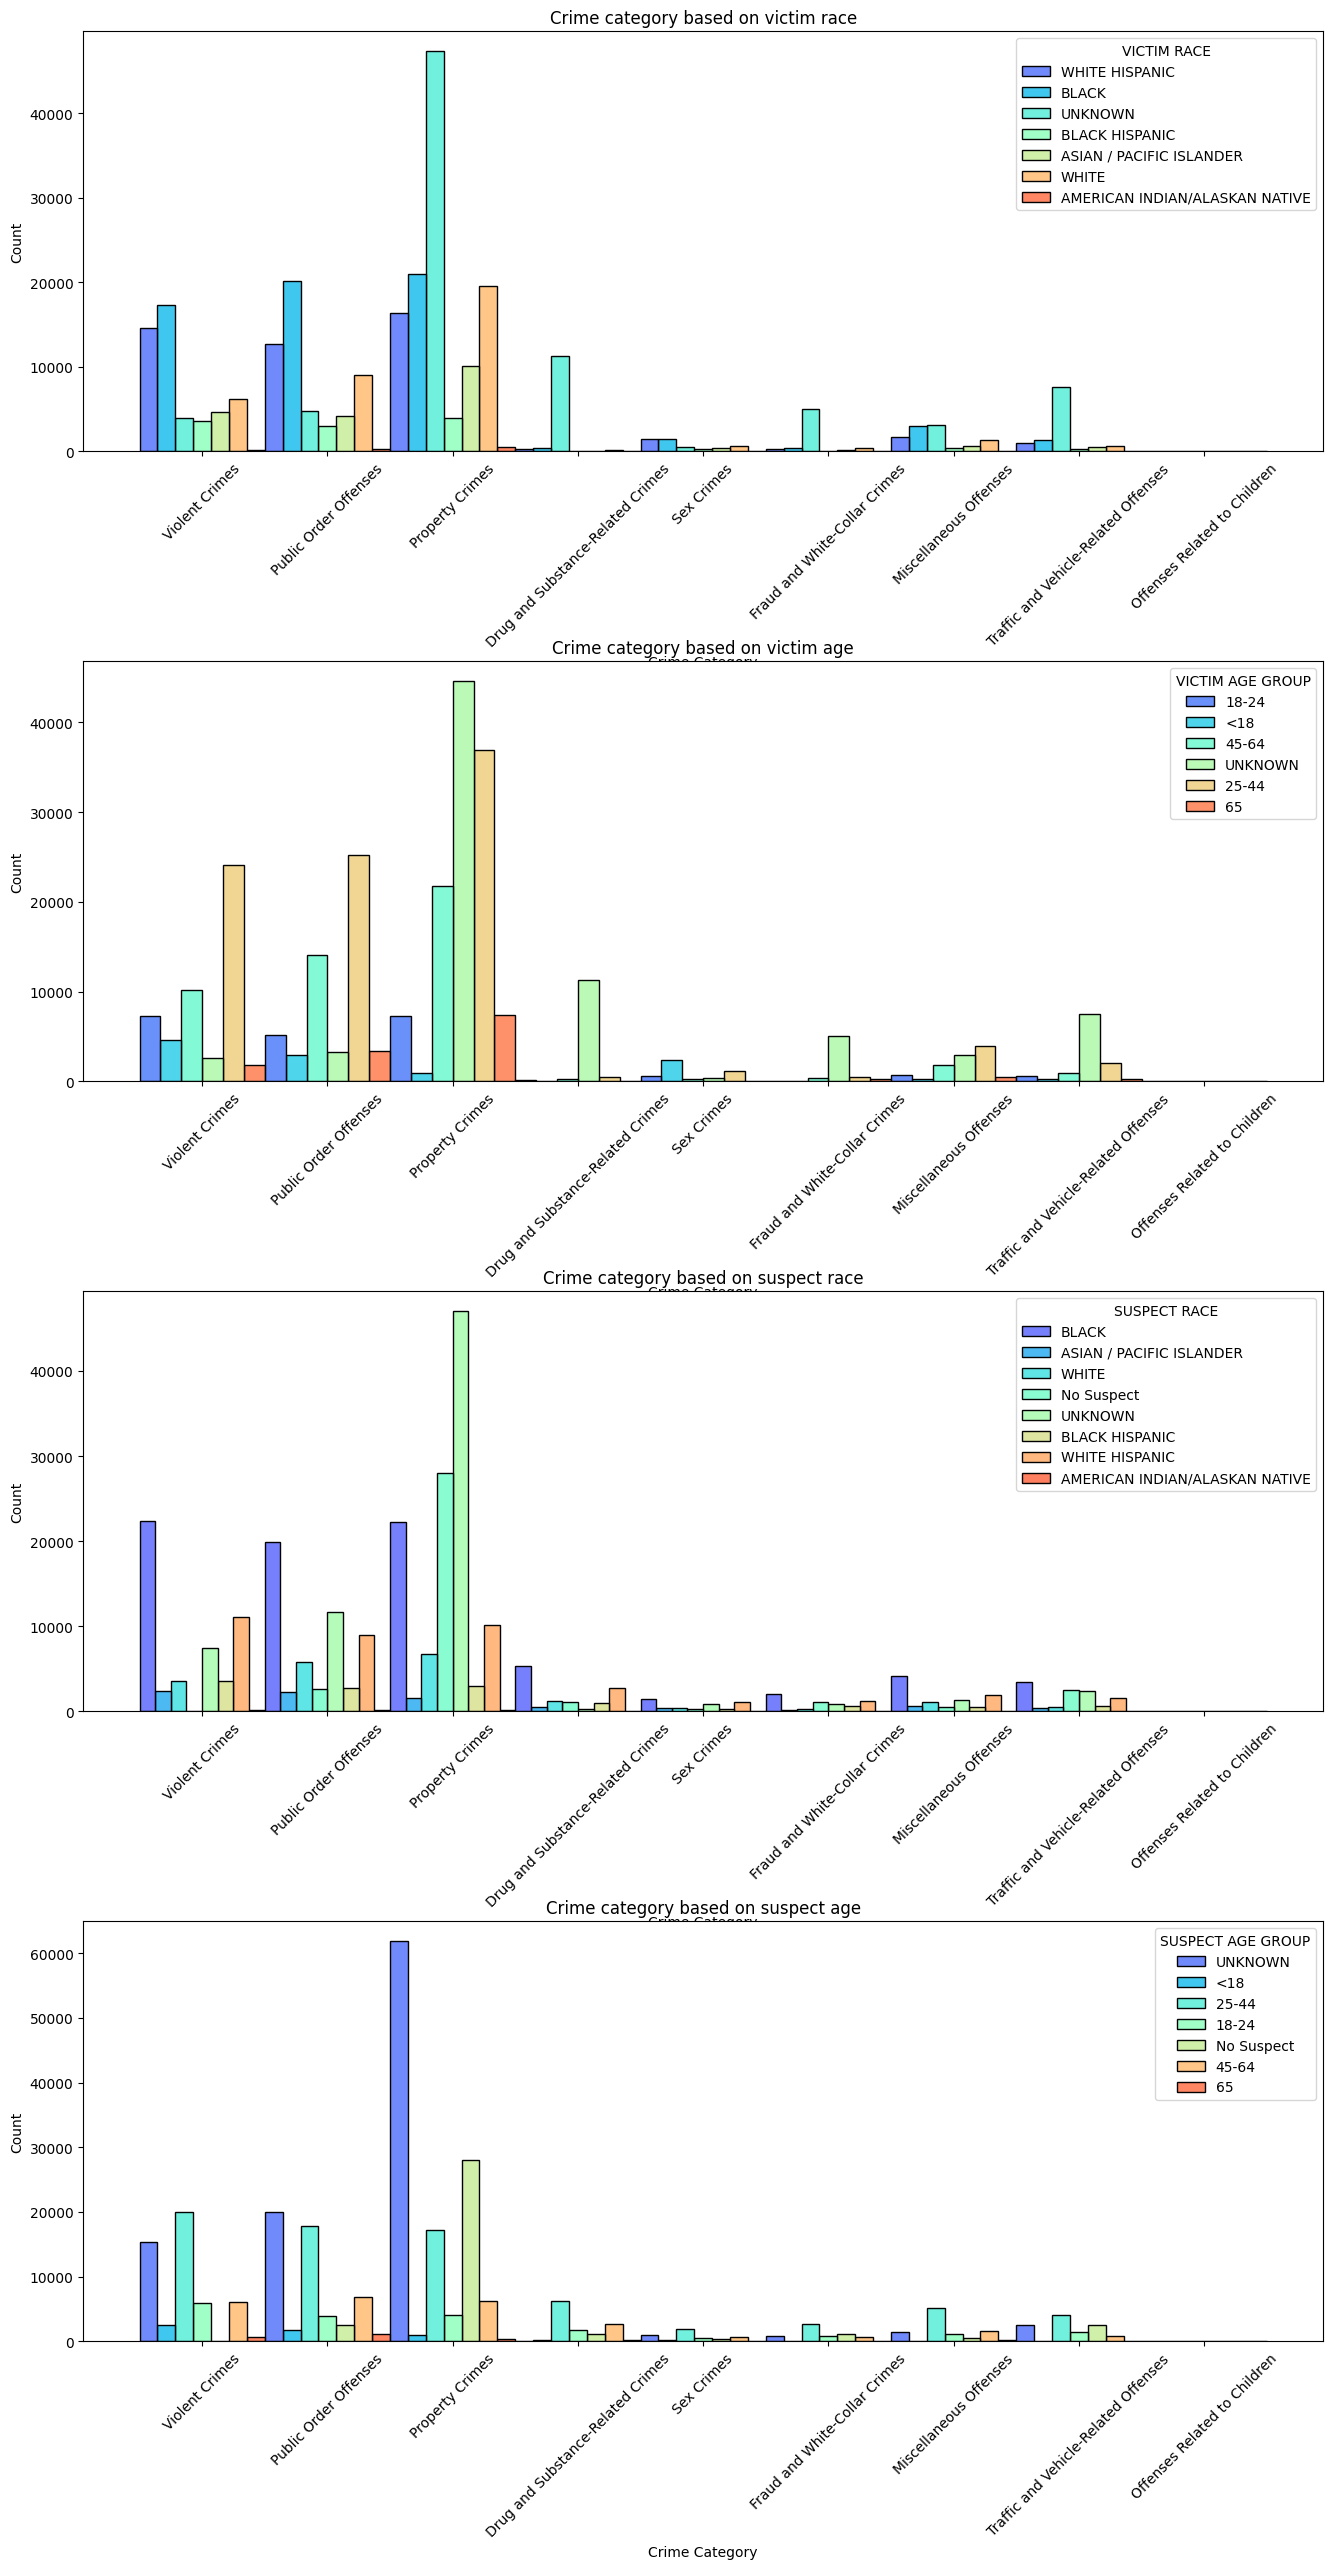

In [40]:
#Comapring different factors with each other 

fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1, figsize = (16,30))
sns.histplot(x='Crime Category', hue = 'VICTIM RACE', data = df, ax =ax1, 
             palette = 'rainbow', multiple = "dodge").set(title="Crime category based on victim race")
sns.histplot(x='Crime Category',hue = 'VICTIM AGE GROUP', ax=ax2, data = df, 
             palette = 'rainbow', multiple ="dodge").set(title = "Crime category based on victim age")
sns.histplot(x='Crime Category',hue = 'SUSPECT RACE', ax=ax3, data = df, 
             palette = 'rainbow', multiple ="dodge").set(title = "Crime category based on suspect race")
sns.histplot(x='Crime Category',hue = 'SUSPECT AGE GROUP' , ax=ax4, data = df, 
             palette = 'rainbow', multiple ="dodge").set(title = "Crime category based on suspect age")

plt.subplots_adjust(hspace=0.5)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)
ax4.tick_params(axis='x', rotation=45)

plt.show()

From the first graph, we can see that most violet crimes are commited against black people followed by white hispanic people. The same goes for the Public Order Offenses. We can also see that, white people are targetted more for property based crimes than compared to the other crimes.

Based on the second graph, we can see that all crimes follow a common trend with highest number of victims are from the age group 25-44 followed by 45-64 except for sex crimes. Sex crimes are commited more on people under the agae of 18. 

From the third graph, we can see that it follows the same pattern where black people are the suspects of most crimes in each crime type. Although, we can also see that, most suspects are not caught for the property crimes. The same goes for Traffic and Vechicle Related Offenses

In the last graph, we can see that it follows the same general trend where people in the age range 24-45 are suspects of most of the crimes in each of the crime type. 


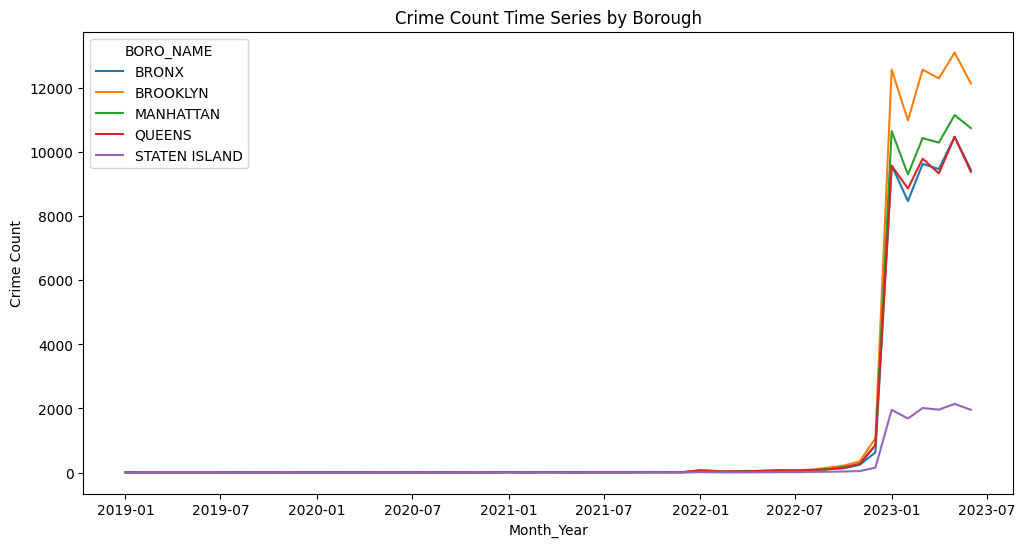

In [41]:
df['Month_Year'] = pd.to_datetime(df['DATE']).dt.to_period('M').dt.to_timestamp()

# Grouping data by 'borough' and 'date' and counting occurrences implicitly

df_filtered = df[df['Month_Year'].dt.year > 2018]
grouped_df = df_filtered.groupby(['BORO_NAME', 'Month_Year']).size().reset_index(name='crime_count')

# Plotting time series for each borough using Seaborn's lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Month_Year', y='crime_count', hue='BORO_NAME')
plt.title('Crime Count Time Series by Borough')
plt.xlabel('Month_Year')
plt.ylabel('Crime Count')
plt.legend(title='BORO_NAME')
plt.show()

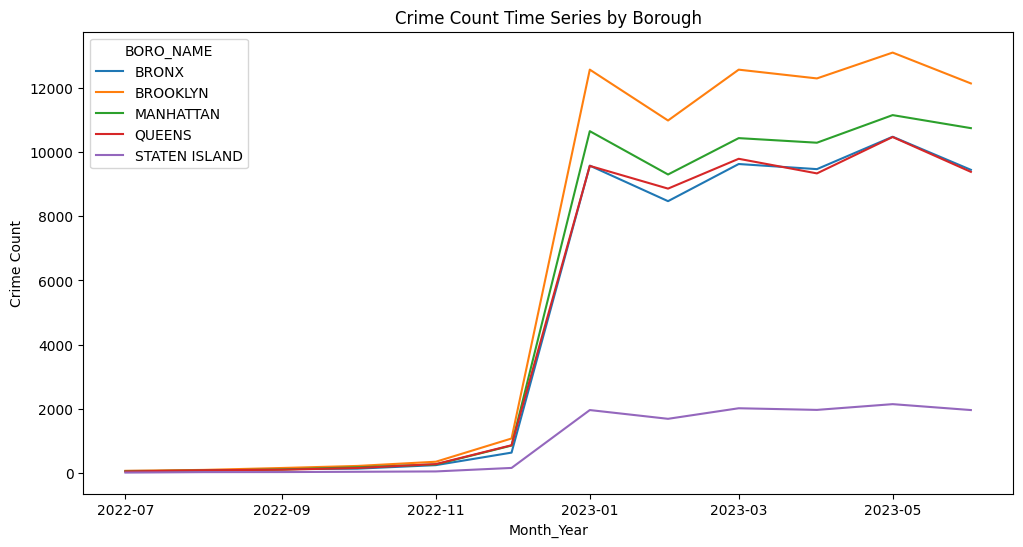

In [42]:
#Zooming in to analyze the trend
df['Month_Year'] = pd.to_datetime(df['DATE']).dt.to_period('M').dt.to_timestamp()

# Grouping data by 'borough' and 'date' and counting occurrences implicitly

df_filtered = df[df['DATE'] > '2022-07']
grouped_df = df_filtered.groupby(['BORO_NAME', 'Month_Year']).size().reset_index(name='crime_count')

# Plotting time series for each borough using Seaborn's lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Month_Year', y='crime_count', hue='BORO_NAME')
plt.title('Crime Count Time Series by Borough')
plt.xlabel('Month_Year')
plt.ylabel('Crime Count')
plt.legend(title='BORO_NAME')
plt.show()

From the above graph, it is visible that all boroughs seemed to have low crime rate in 2022 and the trend shows a sudden increase in the crime rate for each of the borough from 11/2022. Based on the graph, Brooklyn has the maxiumum rise in crime from 11/2022 to 01/2023. The crime rates then seem to reduce for each of the boroughs from January to Febuary and then seem to rise again in March. Each borough follows the same trend. There is some kind of seasonlity aspect involved in this. Crimes in staten island are always lower than 2000 whereas in Brooklyn, the crimes usually range from about 10000 to 13000.

In [43]:
#Converting time to categorical variable so crimes at different times can be analyzed 
df['TIME'] = pd.to_datetime(df['TIME']).dt.time

#Extracting the hour from the time and convert to float
df['hour'] = pd.to_datetime(df['TIME'], format='%H:%M:%S').dt.hour.astype(float)

# Defining bins and labels for different parts of the day
bins = [0, 6, 12, 16, 19, 24]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

#Categorizing the 'hour' column
df['TIME CATEGORY'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)



In [44]:
df

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE",Crime Category,Premise Category,Month_Year,hour,TIME CATEGORY
0,BRONX,2023-03-04,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)",Violent Crimes,Commercial,2023-03-01,12.0,Afternoon
1,STATEN ISLAND,2023-05-19,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,<18,BLACK,M,<18,BLACK,M,NaN,Violent Crimes,Unknown,2023-05-01,15.0,Afternoon
2,BRONX,2023-06-24,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,NaN,25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)",Public Order Offenses,Unknown,2023-06-01,14.0,Afternoon
3,MANHATTAN,2022-04-01,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,Unknown,"(40.815904, -73.945123)",Property Crimes,Other,2022-04-01,15.0,Afternoon
4,MANHATTAN,2022-12-29,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)",Public Order Offenses,Residential,2022-12-01,0.0,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271712,BROOKLYN,2023-06-28,21:10:00,MISDEMEANOR,INSIDE,ASSAULT 3 & RELATED OFFENSES,RESIDENCE - APT. HOUSE,45-64,WHITE,F,65,WHITE,F,"(40.653822, -73.910472)",Violent Crimes,Residential,2023-06-01,21.0,Night
271713,MANHATTAN,2023-06-29,14:45:00,MISDEMEANOR,INSIDE,PETIT LARCENY,TELECOMM. STORE,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,Unknown,"(40.749673, -73.987955)",Property Crimes,Commercial,2023-06-01,14.0,Afternoon
271714,BROOKLYN,2023-06-29,01:20:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,25-44,BLACK,M,25-44,BLACK,F,"(40.676472, -73.897039)",Public Order Offenses,Residential,2023-06-01,1.0,Early Morning
271715,BROOKLYN,2023-06-28,10:30:00,FELONY,FRONT OF,GRAND LARCENY,STREET,No Suspect,No Suspect,No Suspect,25-44,WHITE,M,"(40.694495, -73.930828)",Property Crimes,Public Places or Outdoor,2023-06-01,10.0,Morning


[Text(0.5, 1.0, 'Crimes at different times of the day based on borough')]

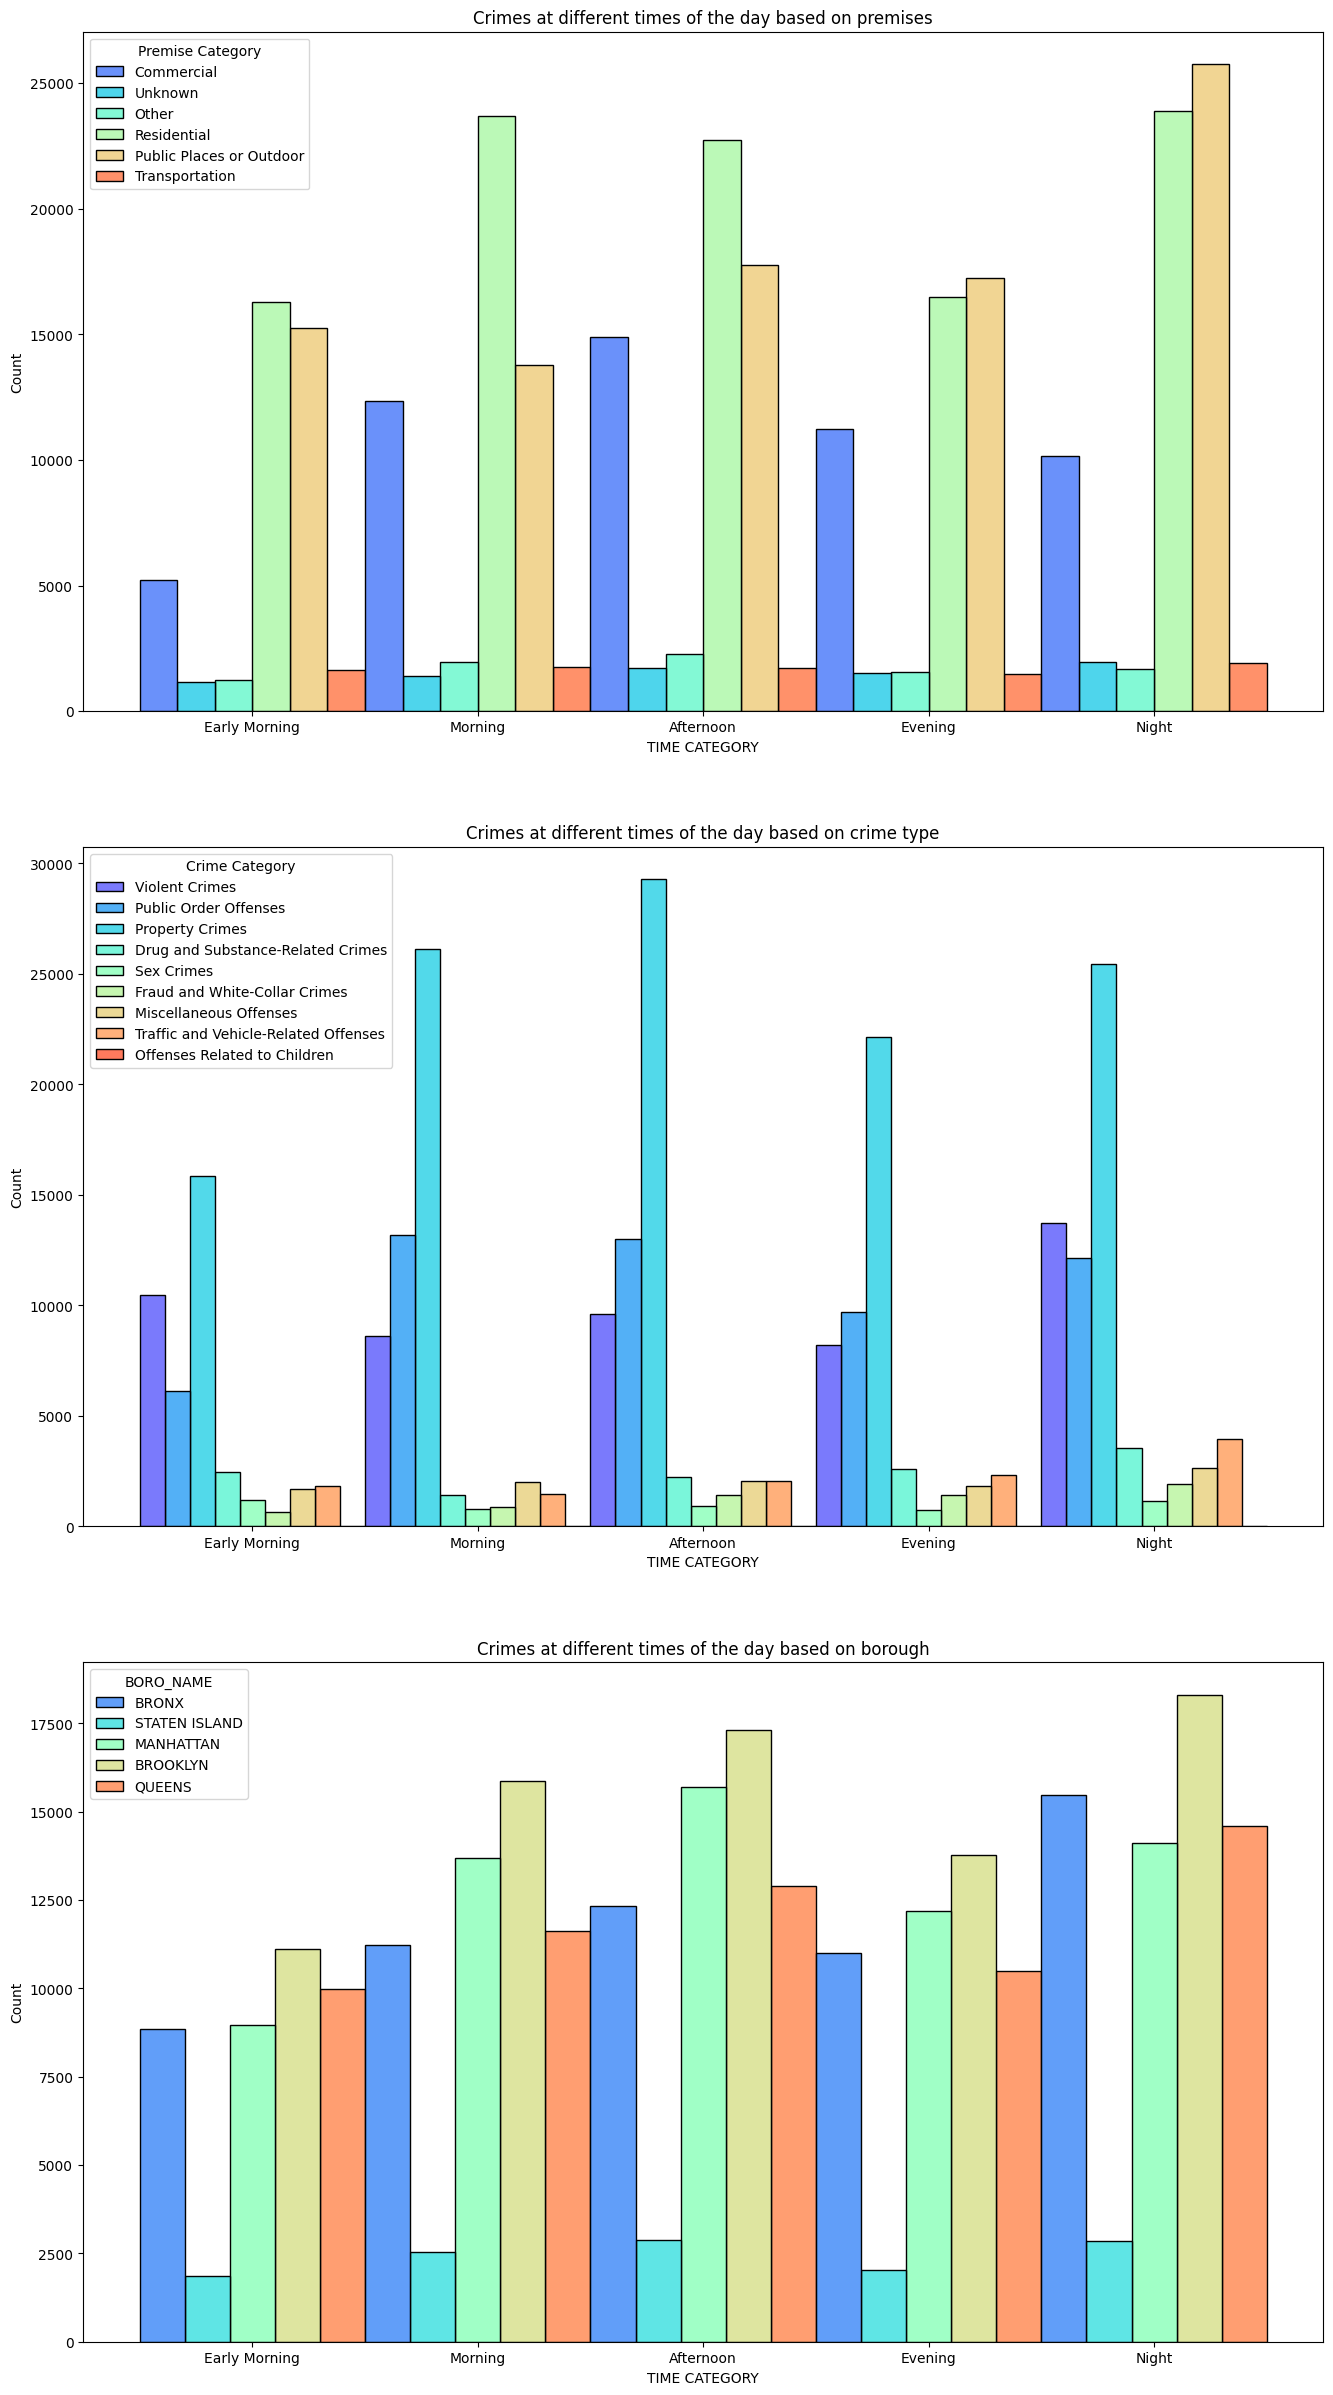

In [45]:
#Now that we have the categories, let's analyze the different types of offense the time they happen at

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (16,30))
sns.histplot(x='TIME CATEGORY', hue = 'Premise Category', data = df, ax =ax1, 
             palette = 'rainbow', multiple = "dodge").set(title="Crimes at different times of the day based on premises")
sns.histplot(x='TIME CATEGORY',hue = 'Crime Category', ax=ax2, data = df, 
             palette = 'rainbow', multiple ="dodge").set(title = "Crimes at different times of the day based on crime type")
sns.histplot(x='TIME CATEGORY',hue = 'BORO_NAME', ax=ax3, data = df, 
             palette = 'rainbow', multiple ="dodge").set(title = "Crimes at different times of the day based on borough")


From the first graph, we can tell how most crimes in the public or outdoor areas happen at evening and night times and this so because there are lesser people around in public. At all other times, residential crimes are the highest. We can also see a small rise in transportation crimes at night time. Commericial crimes also seem to reduce at night which could be possible since most commercial places shut down after a certain time.

From the second graph we can see that at any given time property crimes are commited the most. Although, we can see a trend where there are less crimes commited during the evening time. We can also see how violent crimes increase during the night and early morning times and this could again be because its dark at night and people are usually asleep, hence people think they can get away with commiting a violent crime. Moreover, most crimes apart from property and public order offenses seem to increase at night.

In the third graph, we can see the same general trend where crimes seem to be lesser in the evening than the other times. Brooklyn seems to have the most crimes compared to other boroughs at all times. Bronx seems to have more crimes than Queens during the evening and night times. 



To summarize the analysis:

1. Overall, maximum number of crime has been identified in the Brooklyn.
2. Most of the suspects and victims belong to the age group of 25-45
3. Most of the suspects and victims are blacks
4. Most of the crime suspects are men

However, it's essential to acknowledge that our understanding of the overall population and its demographics in NYC is limited, which could introduce biases and significantly impact our analysis. For example, if the largest demographic in NYC belong to the black race, it's logical that this group might be associated with a higher rate of being crime suspects.

These crimes predominantly occur in residential areas and then extend to public spaces such as streets and parking lots. Moreover, our examination reveals that property crimes are the most prevalent, followed by public order offenses. Which explains why the premise of crimes are mostly property related like residential areas followed by public places.  Additionally, there's a notable increase in public crimes during nighttime.

Focusing on the analysis, several critical actions could be taken to reduce the crime rate in NYC for example increasing patrols during nighttime hours, especially in areas prone to public order offenses, could help deter criminal activities and ensure public safety. Additionally, implementing focused policing efforts in Brooklyn and areas with similar crime concentrations could effectively combat criminal activities. 
